In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data into python environment

In [2]:
df=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
df["Status"].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

## Created a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [7]:
df['New_Status']=["Open" if i=="Open" or i=="Pending" else "Closed" for i in df["Status"]]

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [9]:
df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Status
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,Closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,Closed
2223,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,24-Jun-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes,Open


In [12]:
GB=df.groupby('State')

## Which state has the maximum complaints
**Ans: Georgia**

In [21]:
GB.size().to_frame().reset_index().rename({0:'Count of complaints'},axis=1).sort_values('Count of complaints')[::-1].head(1)

,State,Count of complaints
10,Georgia,288


In [34]:
GB2=df.groupby(['State','New_Status']).size().unstack()

In [58]:
t=GB2.sort_values('Open',ascending=False).fillna(0)

In [64]:
t.head(1)

New_Status,Closed,Open
State,,
Georgia,208.0,80.0


## Which state has the highest percentage of unresolved complaints
**Ans: Georgia**

In [68]:
t1=t['Open'].sum()

In [69]:
t2=t['Open'][0]

In [77]:
print(" Georgia is the state which has the highest percentage of unresolved complaints that is",round((t2/t1)*100,2),'%')

 Georgia is the state which has the highest percentage of unresolved complaints that is 15.47 %


In [78]:
df['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [95]:
GB3=df.groupby(['Received Via','New_Status']).size().unstack().fillna(0)

In [101]:
t1=GB3['Closed']['Customer Care Call']
t2=GB3['Closed']['Internet']
total=t1+t2

## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [116]:
print('The percentage of complaints resolved till date, which were received through the Internet and customer care calls')
print("Customer care calls: %.2f" % ((t1/total)*100),'%')
print("Internet: %.2f" % ((t2/total)*100),'%')

The percentage of complaints resolved till date, which were received through the Internet and customer care calls
Customer care calls: 50.62 %
Internet: 49.38 %


In [117]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'New_Status'],
      dtype='object')

In [130]:
tt=df['Customer Complaint'].value_counts().to_frame().reset_index()

In [129]:
df.groupby('Customer Complaint').size().to_frame().reset_index().rename({0:'Count'},axis=1).sort_values('Count')[::-1]

,Customer Complaint,Count
160,Comcast,83
331,Comcast Internet,18
266,Comcast Data Cap,17
1631,comcast,13
273,Comcast Data Caps,11
...,...,...
1213,Lack of availability,1
1214,Lack of communication and poor customer service,1
1215,Lack of consistent service,1
1216,Lack of internet speed,1


## Provide a table with the frequency of complaint types

In [131]:
tt=df['Customer Complaint'].value_counts().to_frame().reset_index()
tt

,index,Customer Complaint
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


In [156]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

## Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3

Text(0.5, 0, 'Count')

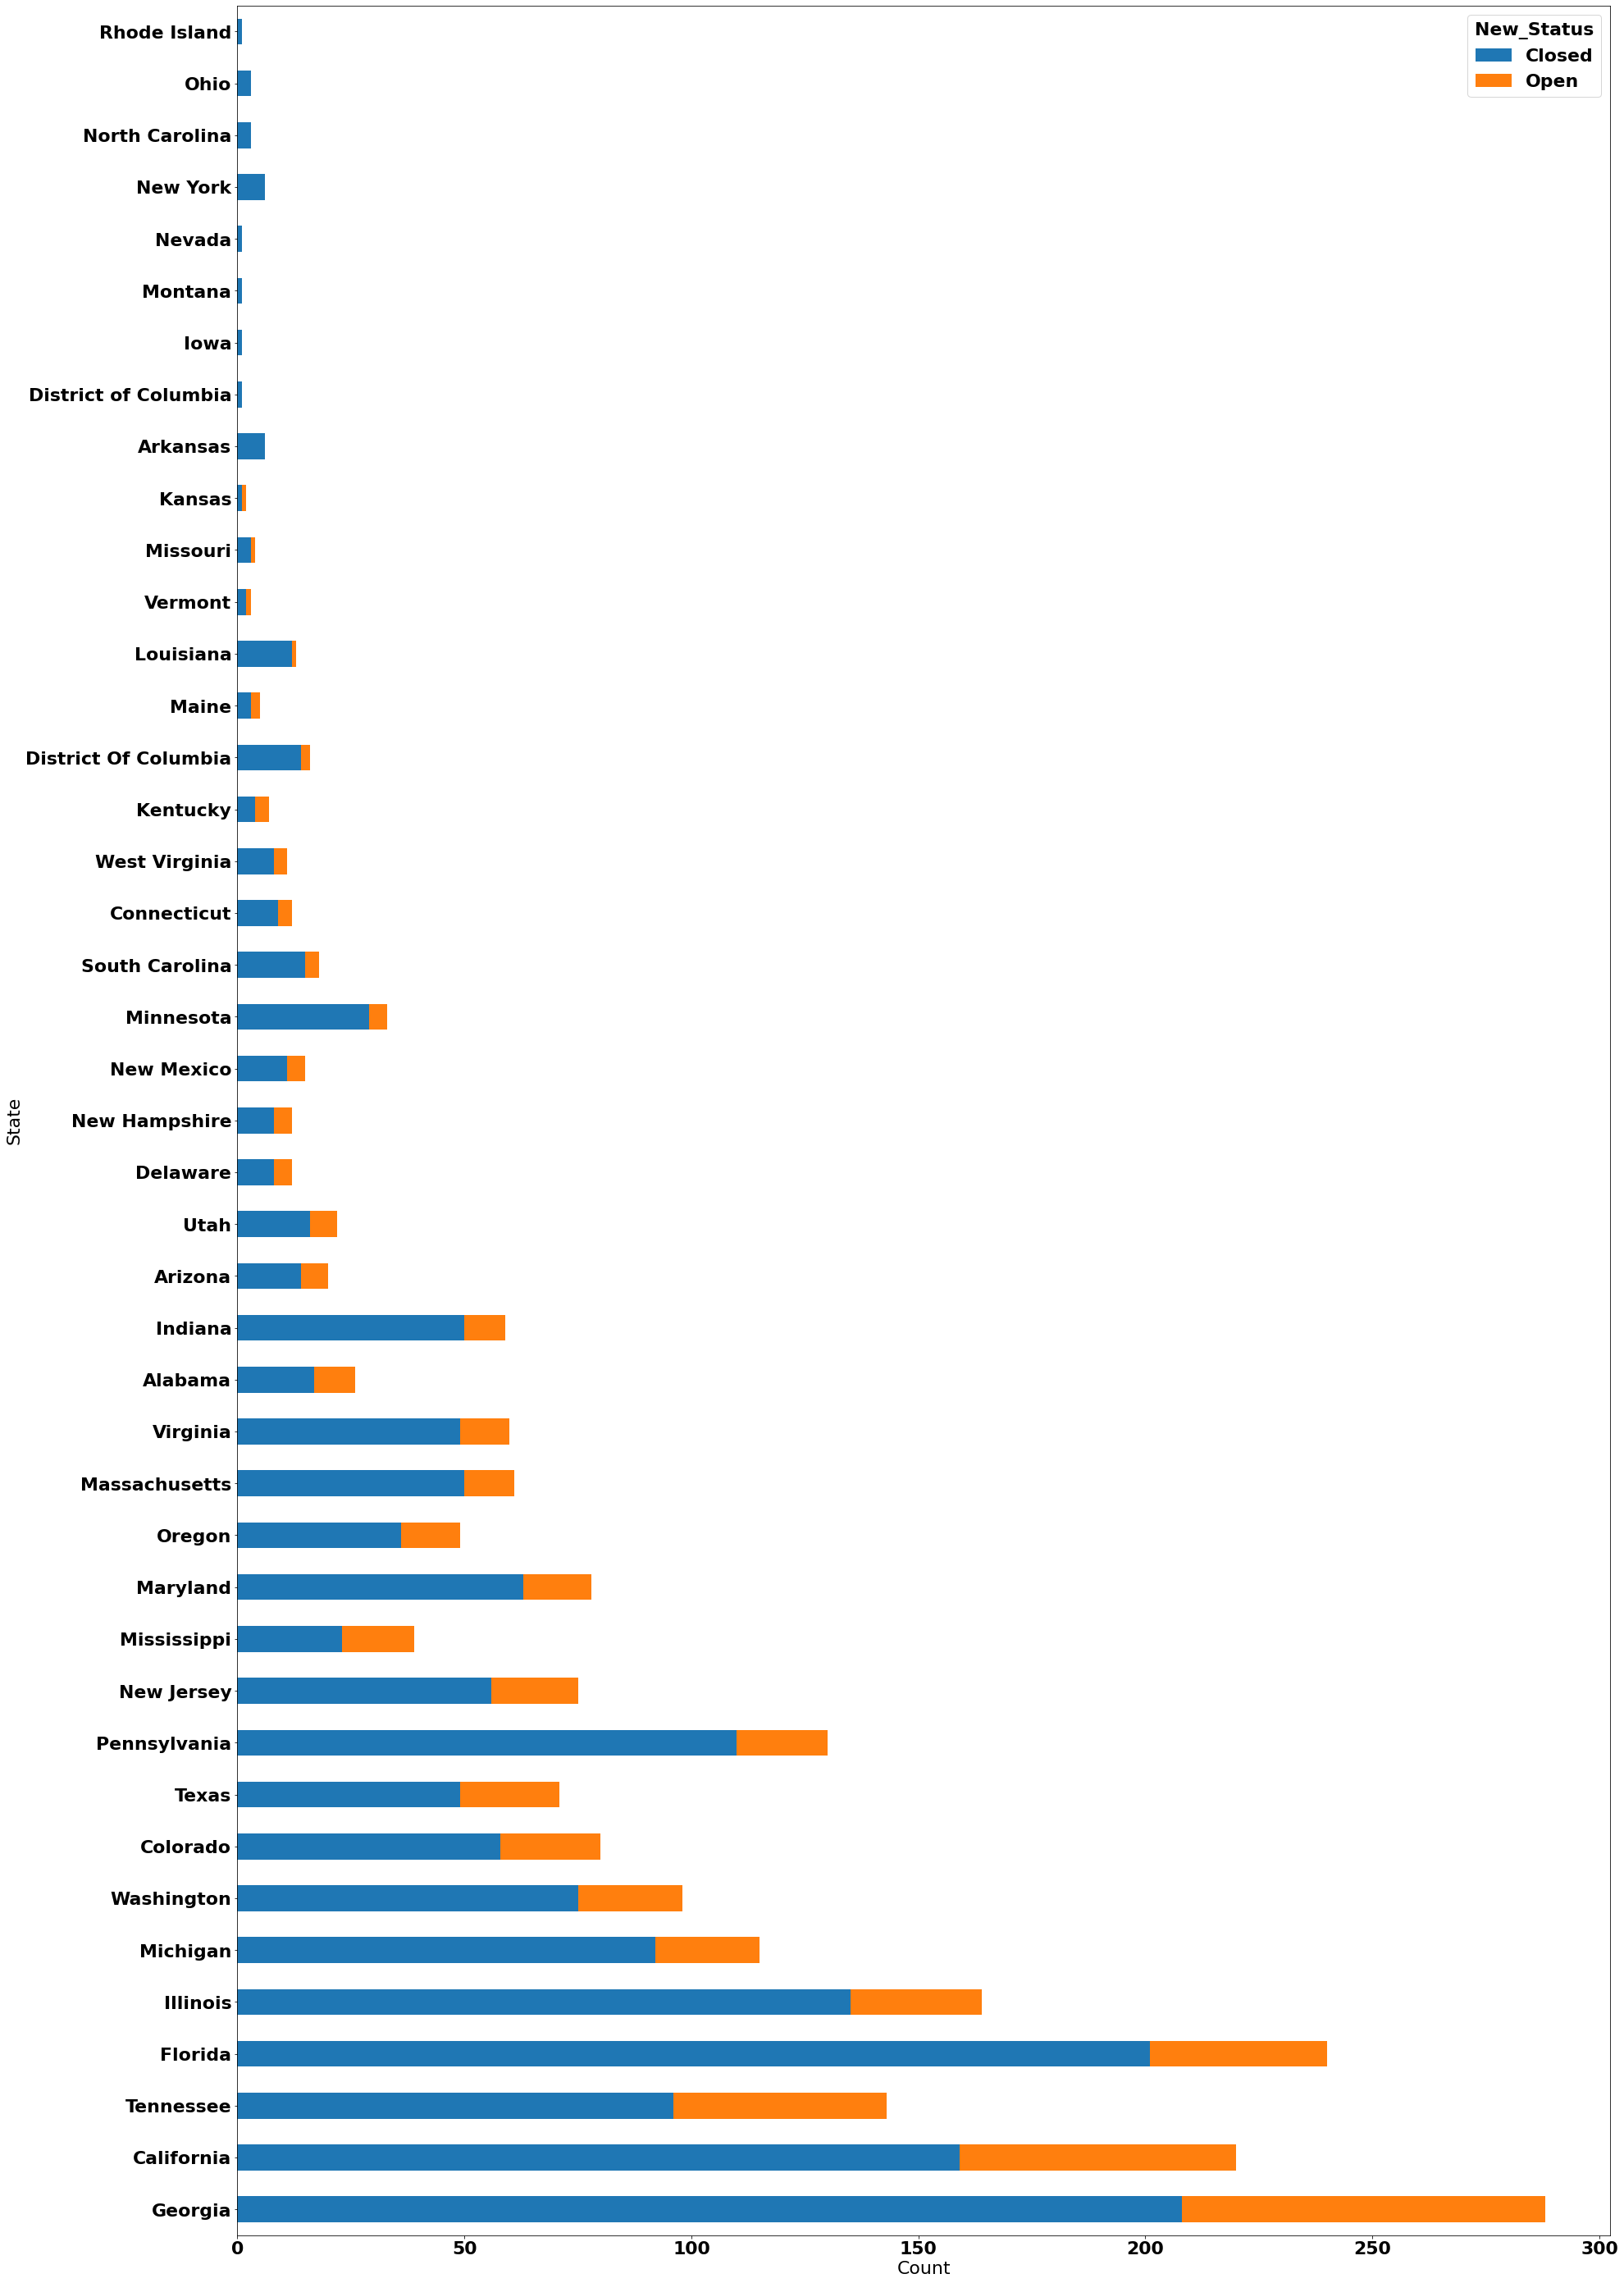

In [157]:
t.plot(kind='barh',figsize=(30,50),stacked=True)
plt.xlabel('Count')

In [165]:
df['Date'].dtype

dtype('<M8[ns]')

In [160]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [161]:
df['Date']=pd.to_datetime(df['Date'])

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  New_Status                   2224 non-null 

## Provide the trend chart for the number of complaints at daily granularity levels.

Text(0, 0.5, 'Counts')

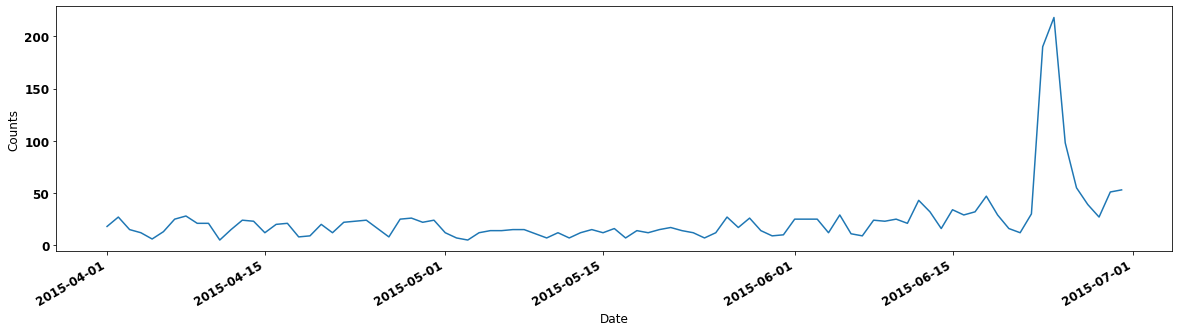

In [181]:
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
df['Date'].value_counts().plot(figsize=(20,5))
plt.xlabel('Date')
plt.ylabel('Counts')

In [188]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])
df['Month_1']=df['Date_month_year'].apply(lambda x:x.month)

In [189]:
df['Month_1'].value_counts()

6     1046
4      375
5      317
8       67
12      65
2       59
1       55
9       55
10      53
7       49
3       45
11      38
Name: Month_1, dtype: int64

In [193]:
df.rename({'Month_1':'Month'},axis=1,inplace=True)

In [191]:
df.drop('Month',axis=1,inplace=True)

In [194]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,New_Status,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed,4
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed,8
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open,7
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed,5


## Provide the trend chart for the number of complaints at monthly granularity levels.

<AxesSubplot:xlabel='Month', ylabel='Customer Complaint'>

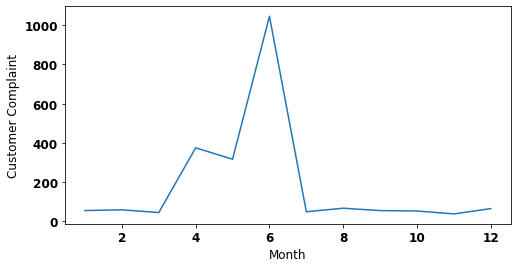

In [206]:
t4 = df.groupby('Month').count().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=t4['Month'], y= t4['Customer Complaint'], sort=False,markers = "o")